In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 1.0 - x

def cls(x):
    return x[1] >= f(x[0])

In [3]:
X = np.random.rand(1000,2)
y = cls(X.T)

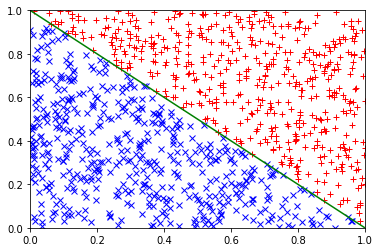

In [4]:
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.plot(X.T[0][y], X.T[1][y], 'r+')
plt.plot(X.T[0][np.logical_not(y)], X.T[1][np.logical_not(y)], 'bx')

px = np.linspace(0, 1, 10)
plt.plot(px, f(px), 'g-')
plt.show()

In [5]:
import sklearn
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [6]:
X_test = np.random.rand(100,2)
y_test = cls(X_test.T)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.99

In [11]:
clf.score(X_test, y_test)

0.99

In [12]:
def f_pred(x):
    return (-clf.intercept_[0] - clf.coef_[0][0] * x) / (clf.coef_[0][1])

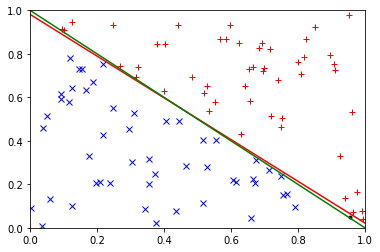

In [14]:
px = np.linspace(0, 1, 10)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Correctly classified
plt.plot(X_test.T[0][ y_test &  y_pred], X_test.T[1][ y_test &  y_pred], 'r+')
plt.plot(X_test.T[0][~y_test & ~y_pred], X_test.T[1][~y_test & ~y_pred], 'bx')

# Incorrectly classified
plt.plot(X_test.T[0][ y_pred & ~y_test], X_test.T[1][ y_pred & ~y_test], 'k.')
plt.plot(X_test.T[0][~y_pred &  y_test], X_test.T[1][~y_pred &  y_test], 'k.')

# Predicted Separator
plt.plot(px, f_pred(px), 'r-')

# Actual Separator
plt.plot(px, f(px), 'g-')
plt.show()